In [226]:
!pip install h2o

In [227]:
import h2o
from h2o.estimators import H2ODeepLearningEstimator
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
exec(open('utils.py').read())

In [228]:
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,2 hours 13 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 3 days
H2O_cluster_name:,H2O_from_python_unknownUser_amvk49
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.120 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [229]:
train = pd.read_csv('train_set.csv').drop(columns= "Unnamed: 0")
print("shape : ", train.shape)
train.head()

shape :  (95810, 11)


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,0.448835,52,0,0.120118,50000.0,13,0,2,0,2.0,1
1,0.085447,72,0,2.314803,1600.0,28,0,0,0,0.0,0
2,0.116044,58,0,0.266702,7483.0,6,0,1,0,3.0,0
3,0.010956,75,0,0.310354,3872.0,10,0,1,0,1.0,0
4,0.246644,45,0,0.109969,3500.0,5,0,0,0,1.0,0


In [230]:
test = pd.read_csv('test_set.csv').drop(columns= "Unnamed: 0")
print("shape : ", test.shape)
y_test = test['SeriousDlqin2yrs']
test.head()

shape :  (23953, 11)


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,0.024513,62,0,0.745496,4384.0,17,0,2,0,0.0,0
1,0.362866,70,0,0.440753,3400.0,10,0,1,0,0.0,1
2,0.164528,51,1,0.508498,5000.0,10,0,1,0,1.0,0
3,0.077810,59,0,0.304306,6200.0,13,0,2,0,0.0,0
4,0.041764,69,0,0.086941,5750.0,4,0,1,0,1.0,0


In [231]:
train, valid = train_test_split(train, test_size=0.20, random_state=42)

In [232]:
predictors = ["RevolvingUtilizationOfUnsecuredLines", "age", "NumberOfTime30-59DaysPastDueNotWorse",
              "DebtRatio", "MonthlyIncome", "NumberOfOpenCreditLinesAndLoans", "NumberOfTimes90DaysLate",
              "NumberRealEstateLoansOrLines", "NumberOfTime60-89DaysPastDueNotWorse",
              "NumberOfDependents"]
response = "SeriousDlqin2yrs"


In [233]:
train = h2o.H2OFrame(train)
valid = h2o.H2OFrame(valid)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [234]:
train[predictors] = train[predictors].scale()
valid[predictors] = valid[predictors].scale()
test[predictors] = test[predictors].scale()

In [235]:
train[response] = train[response].asfactor()
valid[response] = valid[response].asfactor()
test[response] = test[response].asfactor()

In [236]:
weights = [0.53731661, 7.19942891]

## Deep Learning Model 1

In [237]:
dl_model_1 = H2ODeepLearningEstimator(
    model_id="dl_model_1",
    hidden=[120, 120],
    epochs=1,
    variable_importances=True,
    balance_classes=True,
    class_sampling_factors=weights,
    seed=2000000
)

# Train the model
dl_model_1.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

# Get a summary of the model
dl_model_1.show()

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: dl_model_1


Status of Neuron Layers: predicting SeriousDlqin2yrs, 2-class classification, bernoulli distribution, CrossEntropy loss, 16,082 weights/biases, 196.9 KB, 76,310 training samples, mini-batch size 1
    layer    units    type       dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight            weight_rms           mean_bias              bias_rms
--  -------  -------  ---------  ---------  ----  ----  ---------------------  ---------------------  ----------  ---------------------  -------------------  ---------------------  --------------------
    1        10       Input      0.0
    2        120      Rectifier  0.0        0.0   0.0   0.006715490302449325   0.006190221756696701   0.0         -0.005093543050791898  0.10653626918792725  0.16396372542279172    0.11222949624061584
    3        120      Rectifier  0.0        0.0   0.0   0.20670181624584882    0.25269317626953125    0.0         -0.03916849420760501   0.09661465883255005  0.8226015293348127     0.08039143681526184
    4        2        Softmax               0.0   0.0   0.0068415729789800634  0.0038476726040244102  0.0         -0.043750899877826065  0.3875504732131958   1.861229228979598e-05  0.029866263270378113

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.3462637723953561
RMSE: 0.5884418173408108
LogLoss: 1.1437842184017362
Mean Per-Class Error: 0.2410872819797781
AUC: 0.8479387253001152
AUCPR: 0.845168301030822
Gini: 0.6958774506002303

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.028466745612360223
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      3354  1595  0.3223   (1595.0/4949.0)
1      794   4172  0.1599   (794.0/4966.0)
Total  4148  5767  0.2409   (2389.0/9915.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.0284667    0.777415  354
max f2                       0.00988923   0.859976  383
max f0point5                 0.0735805    0.784765  308
max accuracy                 0.037561     0.768633  343
max precision                0.988391     1         0
max recall                   0.00131996   1         399
max specificity              0.988391     1         0
max absolute_mcc             0.037561     0.53752   343
max min_per_class_accuracy   0.0406776    0.766822  339
max mean_per_class_accuracy  0.037561     0.768605  343
max tns                      0.988391     4949      0
max fns                      0.988391     4965      0
max fps                      0.00131996   4949      399
max tps                      0.00131996   4966      399
max tnr                      0.988391     1         0
max fnr                      0.988391     0.999799  0
max fpr                      0.00131996   1         399
max tpr                      0.00131996   1         399

Gains/Lift Table: Avg response rate: 50.09 %, avg score: 11.73 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100857                   0.85964            1.83685   1.83685            0.92             0.88223     0.92                        0.88223             0.018526        0.018526                   83.6851   83.6851            0.0169095
2        0.0200706                   0.641989           1.95624   1.89625            0.979798         0.716543    0.949749                    

In [238]:
performance = dl_model_1.model_performance(test)
performance

ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.054212447293988594
RMSE: 0.23283566585467227
LogLoss: 0.19722894885773057
Mean Per-Class Error: 0.29562164010115327
AUC: 0.8537846368216111
AUCPR: 0.3783066141150731
Gini: 0.7075692736432222

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.15950870648598256
       0      1     Error    Rate
-----  -----  ----  -------  ----------------
0      21160  1094  0.0492   (1094.0/22254.0)
1      921    778   0.5421   (921.0/1699.0)
Total  22081  1872  0.0841   (2015.0/23953.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.159509     0.435732  195
max f2                       0.0680969    0.519862  264
max f0point5                 0.242272     0.45462   150
max accuracy                 0.355704     0.93291   106
max precision                0.535133     0.654639  53
max recall                   0.00215426   1         396
max specificity              0.95809      0.999955  0
max absolute_mcc             0.159509     0.390934  195
max min_per_class_accuracy   0.0383119    0.769614  305
max mean_per_class_accuracy  0.0443094    0.775497  295
max tns                      0.95809      22253     0
max fns                      0.95809      1699      0
max fps                      0.00126211   22254     399
max tps                      0.00215426   1699      396
max tnr                      0.95809      0.999955  0
max fnr                      0.95809      1         0
max fpr                      0.00126211   1         399
max tpr                      0.00215426   1         396

Gains/Lift Table: Avg response rate:  7.09 %, avg score:  4.90 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100196                   0.502886           8.69395    8.69395            0.616667         0.667843    0.616667                    0.667843            0.0871101       0.0871101                  769.395   769.395            0.082976
2        0.0200392                   0.390047           8.04778    8.37086            0.570833         0.443674    0.59375                     0.555758            0.0806357       0.167746                   704.778   737.086            0.158983
3        0.0300171                   0.320918           6.84269    7.86289            0.485356         0.35447     0.557719                    0.488849            0.0682755       0.236021                   584.269   686.289            0.221732
4        0.0400367                   0.270017           5.28686    7.21821            0.375            0.295216    0.511992                    0.44039             0.0529723       0.288994                   428.686   621.821            0.267964
5        0.0500146                   0.22673            5.42696    6.86086            0.384937         0.246754    0.486644                    0.40176             0.0541495       0.343143                   442.696   586.086            0.315508
6        0.100029                    0.123477           3.55399    5.20742            0.252087         0.167695    0.369366                    0.284727            0.177752        0.520895                   255.399   420.742            0.452997
7        0.150002                    0.0755738          2.2496     4.22203            0.159566         0.0959592   0.299471                    0.22184             0.112419        0.633314                   124.96    322.203        

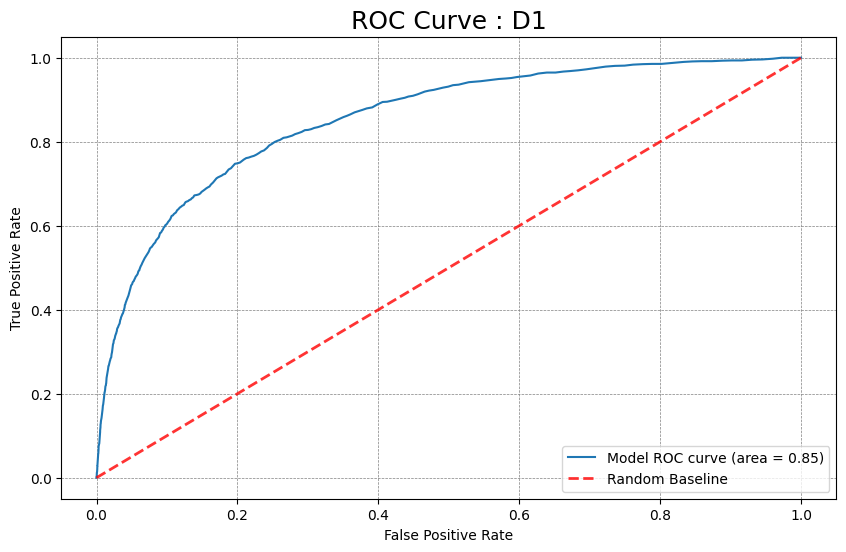

In [239]:
fpr, tpr = performance.roc()
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Model ROC curve (area = %0.2f)' % performance.auc())
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random Baseline', alpha=0.8)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve : {}".format("D1"), size=18)
plt.legend(loc="lower right")
plt.show()

## Deep Learning Model 2

In [240]:

dl_model_2 = H2ODeepLearningEstimator(
    model_id="dl_model_2",
    hidden=[40, 40, 40],
    epochs=1000,
    score_validation_samples=1000,
    stopping_rounds=2,
    stopping_metric="AUTO",
    stopping_tolerance=0.01,
    balance_classes=True,
    class_sampling_factors=weights,
    seed=2000000
)


dl_model_2.train(
    x=predictors,
    y=response,
    training_frame=train,
    validation_frame=valid
)


dl_model_2.show()

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: dl_model_2


Status of Neuron Layers: predicting SeriousDlqin2yrs, 2-class classification, bernoulli distribution, CrossEntropy loss, 3,802 weights/biases, 52.2 KB, 999,795 training samples, mini-batch size 1
    layer    units    type       dropout    l1    l2    mean_rate             rate_rms              momentum    mean_weight           weight_rms           mean_bias             bias_rms
--  -------  -------  ---------  ---------  ----  ----  --------------------  --------------------  ----------  --------------------  -------------------  --------------------  -------------------
    1        10       Input      0.0
    2        40       Rectifier  0.0        0.0   0.0   0.003794850635022158  0.003168052062392235  0.0         -0.07590856281822198  0.36398327350616455  0.27469238094034054   0.1707782745361328
    3        40       Rectifier  0.0        0.0   0.0   0.003706006535312554  0.002505931071937084  0.0         -0.08492421598004513  0.19854795932769775  0.7535418371773209    0.16894620656967163
    4        40       Rectifier  0.0        0.0   0.0   0.06047321974790975   0.08376246690750122   0.0         -0.07327565435926772  0.20739024877548218  0.347171557905582     0.38528287410736084
    5        2        Softmax               0.0   0.0   0.004235853240243159  0.0028679259121418    0.0         0.15150514929555356   0.7713112831115723   0.014839694652680882  0.15154868364334106

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.30929814462222105
RMSE: 0.5561457943940789
LogLoss: 0.976654873240934
Mean Per-Class Error: 0.22472345186305065
AUC: 0.8592830723561561
AUCPR: 0.8561224962738991
Gini: 0.7185661447123122

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.04564943397180416
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      3507  1442  0.2914   (1442.0/4949.0)
1      785   4181  0.1581   (785.0/4966.0)
Total  4292  5623  0.2246   (2227.0/9915.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.0456494    0.789687  340
max f2                       0.0158794    0.860845  375
max f0point5                 0.107155     0.797412  290
max accuracy                 0.0660172    0.78235   321
max precision                0.904068     1         0
max recall                   0.00076883   1         399
max specificity              0.904068     1         0
max absolute_mcc             0.0660172    0.564945  321
max min_per_class_accuracy   0.0624178    0.780709  324
max mean_per_class_accuracy  0.0660172    0.782374  321
max tns                      0.904068     4949      0
max fns                      0.904068     4965      0
max fps                      0.00076883   4949      399
max tps                      0.00076883   4966      399
max tnr                      0.904068     1         0
max fnr                      0.904068     0.999799  0
max fpr                      0.00076883   1         399
max tpr                      0.00076883   1         399

Gains/Lift Table: Avg response rate: 50.09 %, avg score: 14.85 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100857                   0.679081           1.97661   1.97661            0.99             0.738325    0.99                        0.738325            0.0199356       0.0199356                  97.6611

In [241]:
performance = dl_model_2.model_performance(test)
performance

ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.05304307621602035
RMSE: 0.23031082522543386
LogLoss: 0.19310772028770629
Mean Per-Class Error: 0.2944242176301191
AUC: 0.8478549570523803
AUCPR: 0.3717564723833985
Gini: 0.6957099141047607

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.23476676500610036
       0      1     Error    Rate
-----  -----  ----  -------  ----------------
0      21174  1080  0.0485   (1080.0/22254.0)
1      918    781   0.5403   (918.0/1699.0)
Total  22092  1861  0.0834   (1998.0/23953.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.234767     0.438764  168
max f2                       0.0750868    0.508779  267
max f0point5                 0.38801      0.458645  103
max accuracy                 0.422011     0.932785  90
max precision                0.621259     0.642105  28
max recall                   0.000370606  1         399
max specificity              0.901716     0.999955  0
max absolute_mcc             0.234767     0.394287  168
max min_per_class_accuracy   0.055151     0.77163   290
max mean_per_class_accuracy  0.0544012    0.772912  291
max tns                      0.901716     22253     0
max fns                      0.901716     1699      0
max fps                      0.000370606  22254     399
max tps                      0.000370606  1699      399
max tnr                      0.901716     0.999955  0
max fnr                      0.901716     1         0
max fpr                      0.000370606  1         399
max tpr                      0.000370606  1         399

Gains/Lift Table: Avg response rate:  7.09 %, avg score:  6.43 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100196                   0.54127            8.6352     8.6352             0.6125           0.616025    0.6125                      0.616025            0.0865215       0.0865215                  763.52    763.52             0.0823425
2        0.0200392                   0.475399           7.51909    8.07715            0.533333         0.507474    0.572917                    0.561749            0.0753384       0.16186                    651.909   707.715            0.152648
3        0.0300171                   0.415589           7.43257    7.86289            0.527197         0.44293     0.557719                    0.522253            0.0741613       0.236021                   643.257   686.289            0.221732
4        0.0400367                   0.369467           5.87429    7.36522            0.416667         0.392905    0.522419                    0.489882            0.0588582       0.294879                   487.429   636.522            0.274299
5        0.0500146                   0.326928           5.30898    6.955              0.376569         0.349224    0.493322                    0.461821            0.0529723       0.347852                   430.898   595.5              0.320576
6        0.100029                    0.176958           3.47162    5.21331            0.246244         0.244788    0.369783                    0.353304            0.173632        0.521483                   247.162   421.331            0.45363
7        0.150002                    0.109925           1.82559    4.0847             0.12949          0.138544    0.28973                     0.281758            0.0912301       0.612713                   82.5594   308.47            

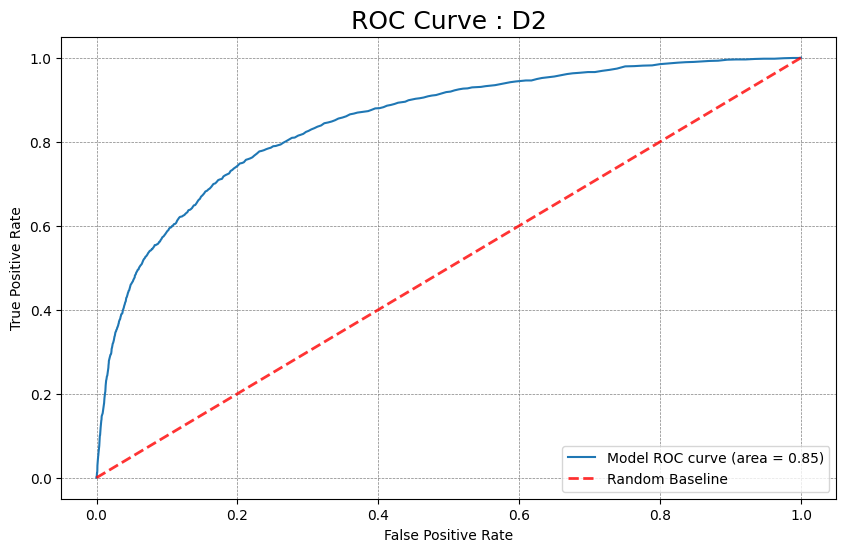

In [242]:
fpr, tpr = performance.roc()
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Model ROC curve (area = %0.2f)' % performance.auc())
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random Baseline', alpha=0.8)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve : {}".format("D2"), size=18)
plt.legend(loc="lower right")
plt.show()

## Deep Learning Modèle 3

In [243]:
dl_model_3 = H2ODeepLearningEstimator(
    model_id="dl_model_3",
    overwrite_with_best_model=True,
    hidden=[120, 120, 120],
    epochs=10,
    score_validation_samples=10000,
    score_duty_cycle=0.025,
    adaptive_rate=False,
    rate=0.01,
    rate_annealing=2e-6,
    momentum_start=0.2,
    momentum_stable=0.4,
    momentum_ramp=1e7,
    l1=1e-5,
    l2=1e-5,
    max_w2=10.,
    balance_classes=True,
    class_sampling_factors=weights,
    seed=2000000
)

dl_model_3.train(
    x=predictors,
    y=response,
    training_frame=train,
    validation_frame=valid
)


dl_model_3.show()

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: dl_model_3


Status of Neuron Layers: predicting SeriousDlqin2yrs, 2-class classification, bernoulli distribution, CrossEntropy loss, 30,602 weights/biases, 248.1 KB, 783,663 training samples, mini-batch size 1
    layer    units    type       dropout    l1     l2     mean_rate             rate_rms    momentum    mean_weight            weight_rms           mean_bias             bias_rms
--  -------  -------  ---------  ---------  -----  -----  --------------------  ----------  ----------  ---------------------  -------------------  --------------------  --------------------
    1        10       Input      0.0
    2        120      Rectifier  0.0        1e-05  1e-05  0.003895103232935071  0.0         0.21567325  -0.012311300629806586  0.16887348890304565  0.324818482387431     0.058483049273490906
    3        120      Rectifier  0.0        1e-05  1e-05  0.003895103232935071  0.0         0.21567325  -0.020279151167747974  0.09194120764732361  0.9443583757239133    0.027763985097408295
    4        120      Rectifier  0.0        1e-05  1e-05  0.003895103232935071  0.0         0.21567325  -0.031384267556808926  0.0952310860157013   0.9164832949660382    0.04348085820674896
    5        2        Softmax               1e-05  1e-05  0.003895103232935071  0.0         0.21567325  0.03597095678851474    0.22693079710006714  0.004425807421307645  0.09858697652816772

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.311684736580701
RMSE: 0.5582873243955132
LogLoss: 0.9680091604087975
Mean Per-Class Error: 0.23041263334664402
AUC: 0.858632823222158
AUCPR: 0.8573883945388426
Gini: 0.7172656464443159

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.04289495866476883
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      3360  1589  0.3211   (1589.0/4949.0)
1      694   4272  0.1398   (694.0/4966.0)
Total  4054  5861  0.2303   (2283.0/9915.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.042895     0.789138  344
max f2                       0.0168984    0.860618  380
max f0point5                 0.102008     0.79551   291
max accuracy                 0.0602953    0.783661  325
max precision                0.833562     1         0
max recall                   0.00390117   1         399
max specificity              0.833562     1         0
max absolute_mcc             0.0602953    0.567353  325
max min_per_class_accuracy   0.0591428    0.781168  326
max mean_per_class_accuracy  0.0602953    0.783669  325
max tns                      0.833562     4949      0
max fns                      0.833562     4964      0
max fps                      0.00390117   4949      399
max tps                      0.00390117   4966      399
max tnr                      0.833562     1         0
max fnr                      0.833562     0.999597  0
max fpr                      0.00390117   1         399
max tpr                      0.00390117   1         399

Gains/Lift Table: Avg response rate: 50.09 %, avg score: 14.79 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100857                   0.647173           1.93668   1.93668            0.97             0.681418    0.97                        0.681418            0.0195328       0.0195328                  93.6679   93.6679            0.0189266
2     

In [244]:
performance = dl_model_3.model_performance(test)
performance

ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.05234145051625188
RMSE: 0.22878253979762503
LogLoss: 0.18964984916029776
Mean Per-Class Error: 0.29342238068661286
AUC: 0.8556132094260006
AUCPR: 0.393080153872568
Gini: 0.7112264188520012

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21096340633584035
       0      1     Error    Rate
-----  -----  ----  -------  ----------------
0      21140  1114  0.0501   (1114.0/22254.0)
1      912    787   0.5368   (912.0/1699.0)
Total  22052  1901  0.0846   (2026.0/23953.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.210963     0.437222  171
max f2                       0.0847052    0.524658  254
max f0point5                 0.340626     0.463044  114
max accuracy                 0.523557     0.93433   54
max precision                0.600664     0.710938  27
max recall                   0.00434992   1         398
max specificity              0.799754     0.999955  0
max absolute_mcc             0.260158     0.393536  147
max min_per_class_accuracy   0.0555531    0.775276  287
max mean_per_class_accuracy  0.0615033    0.777508  278
max tns                      0.799754     22253     0
max fns                      0.799754     1699      0
max fps                      0.00359891   22254     399
max tps                      0.00434992   1699      398
max tnr                      0.799754     0.999955  0
max fnr                      0.799754     1         0
max fpr                      0.00359891   1         399
max tpr                      0.00434992   1         398

Gains/Lift Table: Avg response rate:  7.09 %, avg score:  6.64 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100196                   0.564335           9.4576    9.4576             0.670833         0.613622    0.670833                    0.613622            0.0947616       0.0947616                  845.76    845.76             0.0912117
2        0.0200392                   0.500541           8.04778   8.75269            0.570833         0.532015    0.620833                    0.572819            0.0806357       0.175397                   704.778   775.269            0.167219
3        0.0300171                   0.416285           6.19381   7.9021             0.439331         0.460398    0.560501                    0.53545             0.0618011       0.237198                   519.381   690.21             0.222999
4        0.0400367                   0.348806           6.28549   7.49753            0.445833         0.380779    0.531804                    0.496742            0.0629782       0.300177                   528.549   649.753            0.28
5        0.0500146                   0.297663           4.95505   6.99031            0.351464         0.323405    0.495826                    0.462161            0.0494408       0.349617                   395.505   599.031            0.322476
6        0.100029                    0.167409           3.53046   5.26038            0.250417         0.22462     0.373122                    0.34339             0.176574        0.526192                   253.046   426.038            0.458698
7        0.150002                    0.104455           2.1436    4.22203            0.152047         0.132658    0.299471                    0.273185            0.107122        0.633314                   114.36    322.203            0.52021
8  

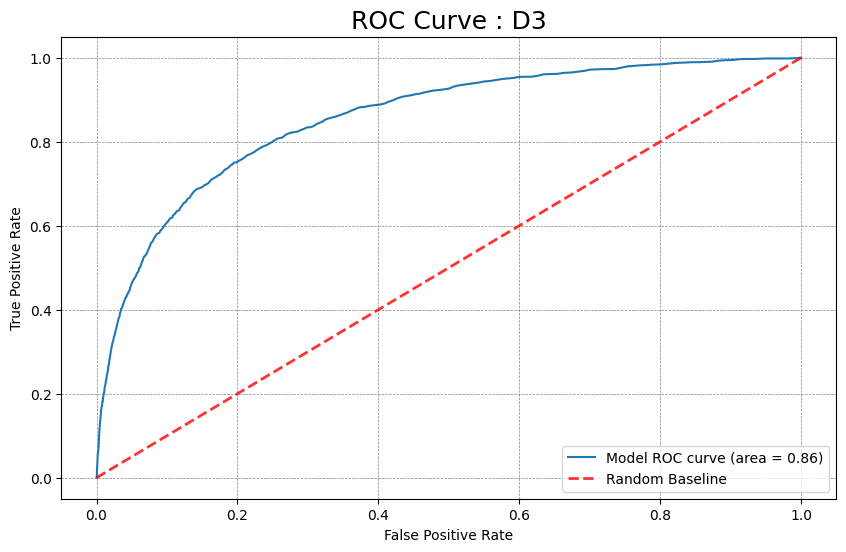

In [245]:
fpr, tpr = performance.roc()
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Model ROC curve (area = %0.2f)' % performance.auc())
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random Baseline', alpha=0.8)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve : {}".format("D3"), size=18)
plt.legend(loc="lower right")
plt.show()